In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
data=pd.read_csv("C:/Users/OSAGIE/Desktop/CAPM_Data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 3 columns):
Date     1258 non-null object
PG       1258 non-null float64
^GSPC    1258 non-null float64
dtypes: float64(2), object(1)
memory usage: 29.6+ KB


In [4]:
data.tail()

,Date,PG,^GSPC
1253,12/23/2016,84.959999,2263.790039
1254,12/27/2016,84.599998,2268.879883
1255,12/28/2016,84.070000,2249.919922
1256,12/29/2016,84.349998,2249.260010
1257,12/30/2016,84.080002,2238.830078


In [5]:
data['Date'] =  pd.to_datetime(data['Date'])
data=data.set_index("Date")

<function matplotlib.pyplot.show(*args, **kw)>

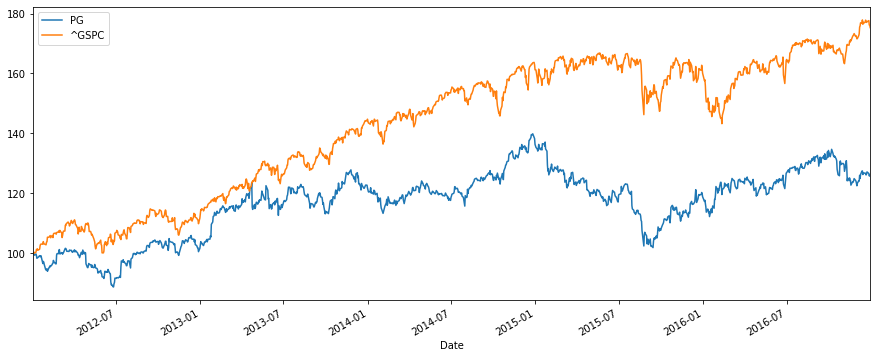

In [6]:
(data/data.iloc[0]*100).plot(figsize=(15,6))
plt.show

In [7]:
returns=np.log(data/data.shift(1))

In [8]:
returns.head()

,PG,^GSPC
Date,,
2012-01-03,NaN,NaN
2012-01-04,-0.000449,0.000188
2012-01-05,-0.004201,0.002939
2012-01-06,-0.002408,-0.002540
2012-01-09,0.004211,0.002259


In [9]:
cov=returns.cov()*250
cov

,PG,^GSPC
PG,0.020843,0.010025
^GSPC,0.010025,0.016361


In [10]:
cov_with_market=cov.iloc[0,1]
cov_with_market

0.010025480950656808

In [12]:
market_var=returns['^GSPC'].var()*250
market_var

0.016360592699269063

### Beta:
$$\beta_{pg}=\frac{\sigma_{pgm}}{\sigma_m}$$

In [16]:
pg_beta=cov_with_market/market_var
pg_beta

0.612782258866741

calculate the expected returns of P&G(CAPM)
$$r_{pg}=r_f + \beta_{pg}(r_m - r_f)$$

In [19]:
pg_er=0.025 + pg_beta*0.05
pg_er

0.05563911294333705

### Sharpe Ratio
$$sharpe=\frac{r_{pg} -r_f}{\sigma_{pg}}$$

In [22]:
sharpe=(pg_er-0.025)/(returns["PG"].std()*250**0.5)
sharpe

0.21222619272784843